# Assignment 3: Implementation a Recursive Algorightm


In this Mini Programming Assignment, we will explore the differences between iteration and recursion.  We will begin with the base code for recursion as described in Chapter 3 of Grokking Algorithms (Bhargava 2016).


## Deliverables:

We will again generate random data for this assignment.  

    1) Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).
    2) Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.
    3) Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary. 
    4) Organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.
    5) Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.

### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports, Function construction and Array generation

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import time
from decimal import Decimal

RANDOM_SEED = 123

In [2]:
def LoopFact(x):
    fact = 1
    for i in range(1,x+1):
        fact = fact * i
    return fact


def RecursiveFact(x):
    if x == 1:
        return 1
    else:
        return x * RecursiveFact(x-1)

def FactContainer(arr, fun):
    factorials = []
    times = []
    for i in range(0, len(arr)):
        start= time.perf_counter()
        x = arr[i]
        fact = fun(int(x))
        end = time.perf_counter()
        duration = (end-start)* 1E3
        factorials.append(fact)
        times.append(duration)
    return factorials, times
        

In [3]:
np.random.seed(RANDOM_SEED)    
arr = np.random.randint(low=100, high= 501, size=10)
arr = np.int64(arr)
arr

array([465, 482, 422, 198, 330, 117, 183, 206, 223, 157], dtype=int64)

In [4]:
# Test array, I needed something verifiable
#r = np.random.randint(low=5, high =10, size=2)
#r

# B1. Generate Factorials and times for the loop function using the FactContainer function

In [5]:
LoopFactorials = FactContainer(arr, LoopFact)


In [6]:
LoopFactorials

([14176964438627677379509698628536437579676610567144510273680627242986046150646106164143835677681090077758716511864212672821903181955381103965745455547530364725861055575253263560580447761694963745552469286815736369239857650166527862075495112476668990665617318167231583869267943551403370386127565746380001669708810246618255994911977776828393935800580205567013531743898891289191298050378413673660191151711770526893934380915485266171546397076533872886078723639776074459538001530135304467817785032605266336226135333386295032651046348785333356916241606573844004246851721475009152870226738429739561253059240978641388061064434037930882168754758269462198182993325279800020673743877711024231692024086174524634104857807764583808316682335993335169339741610145681457234261966418372006773944378859578619055275294855494564550082027637531380598217151417583231036547275963117705199192498284460945192203348027972437307885963015473674540248622694400000000000000000000000000000000000000000000000000000000000000000000000

# B2. Generate Factorials Recursively using the FactContainer function

In [7]:
RecrusiveFactorials = FactContainer(arr, RecursiveFact)
RecrusiveFactorials

([14176964438627677379509698628536437579676610567144510273680627242986046150646106164143835677681090077758716511864212672821903181955381103965745455547530364725861055575253263560580447761694963745552469286815736369239857650166527862075495112476668990665617318167231583869267943551403370386127565746380001669708810246618255994911977776828393935800580205567013531743898891289191298050378413673660191151711770526893934380915485266171546397076533872886078723639776074459538001530135304467817785032605266336226135333386295032651046348785333356916241606573844004246851721475009152870226738429739561253059240978641388061064434037930882168754758269462198182993325279800020673743877711024231692024086174524634104857807764583808316682335993335169339741610145681457234261966418372006773944378859578619055275294855494564550082027637531380598217151417583231036547275963117705199192498284460945192203348027972437307885963015473674540248622694400000000000000000000000000000000000000000000000000000000000000000000000

# B3. Formatting adjustments and equivalency test for loop vs recursive factorial

In [8]:
#For the factorials generated these two chunks format the factorials retaining two decimal places and placing them in scientific notation (both for the loop and recursive algorightm)

Factorials_R = RecrusiveFactorials[0]
SciFacts_R = []
for i in Factorials_R:
        SciFacts_R.append(f"{Decimal(str(i)):.2E}")

Factorials_L = LoopFactorials[0]
SciFacts_L = []
for i in Factorials_L:
        SciFacts_L.append(f"{Decimal(str(i)):.2E}")


In [9]:
SciFacts_L == SciFacts_R # test for equivalency

True

# C Dataframe construction and graphical representation of computation time

In [10]:
Summary = {
    'Integer': arr ,
    'Factorial': SciFacts_L,
    'ForLoop': LoopFactorials[1],
    'Recursion': RecrusiveFactorials[1]
    }

df = pd.DataFrame.from_dict(Summary)


In [11]:
df

,Integer,Factorial,ForLoop,Recursion
0,465,1.42E+1040,0.0662,0.3546
1,482,4.36E+1085,0.0612,0.1142
2,422,2.10E+926,0.0490,0.0853
3,198,1.98E+370,0.0169,0.0309
4,330,2.82E+689,0.0345,0.0602
5,117,3.97E+192,0.0092,0.0168
6,183,1.21E+336,0.0155,0.0277
7,206,5.60E+388,0.0182,0.0323
8,223,2.50E+428,0.0211,0.0375
9,157,1.17E+278,0.0128,0.0230


In [12]:
df1 = df.drop('Factorial', axis = 1)

In [13]:
long_df =  df1.melt(id_vars=['Integer'],
                    value_vars=['ForLoop', 'Recursion'],var_name='Algo', value_name='Time(ms)')

In [14]:
long_df

,Integer,Algo,Time(ms)
0,465,ForLoop,0.0662
1,482,ForLoop,0.0612
2,422,ForLoop,0.0490
3,198,ForLoop,0.0169
4,330,ForLoop,0.0345
5,117,ForLoop,0.0092
6,183,ForLoop,0.0155
7,206,ForLoop,0.0182
8,223,ForLoop,0.0211
9,157,ForLoop,0.0128


<AxesSubplot:xlabel='Integer', ylabel='Time(ms)'>

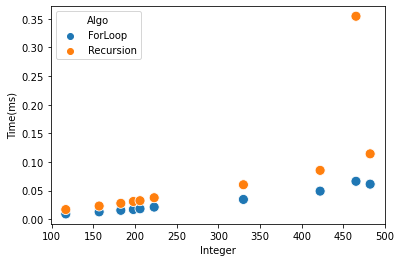

In [15]:
sns.scatterplot(data = long_df, x='Integer', hue='Algo', y='Time(ms)', s=100)


Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

In [ ]:
def LoopFact(x):
    fact = 1
    for i in range(1,x+1):
        fact = fact * i
    return fact


def RecursiveFact(x):
    if x == 1:
        return 1
    else:
        return x * RecursiveFact(x-1)

def FactContainer(arr, fun):
    factorials = []
    times = []
    for i in range(0, len(arr)):
        start= time.perf_counter()
        x = arr[i]
        fact = fun(int(x))
        end = time.perf_counter()
        duration = (end-start)* 1E3
        factorials.append(fact)
        times.append(duration)
    return factorials, times
        

# Discussion

### The recursive algorithm seems to underperform here in all cases. It does appear that desite a single outlier both of these functions are linear with respect to time. This makes sense because there's a single multiplcation increase for every increment of an integer. Therefore these algorithms are O(n). The compoutational times for these two algorightms are not incredibly different. Since there is only a single loop in the LoopFact function. I would make the argument that it is much more readible. For algorithms requiring case type evalutions the readibility starts to go down and the amount of code that has to be written will increase. Therefore switching to an algorithm that uses recursion will cut down on the verbose nature of the code. There are three functions in this experiment (two functions for each factorial algorithm and a single function which collects the return values for each item in a supplied array given the application of the desired factorial function):

LoopFact(): 

    This function uses a for loop to itearte over the range of the supplied integer starting at 1 and going to the integer itself.
    Each iteration it takes the incremental integer and multiplies it by the product of the previous loop returning the final product when it reaches the supplied integer.

RecursiveFact():

    This function decrements the value of a supplied integer until the value of the decremented integer reaches 1. Returning the final product of the recursive stack of decrements.
    
FactContainer(): 
    
    This function is just a simple loop that serves to collect the factorials and computation times for an array of integers when supplied with that array of integers and one of the above algorithms. It's actually an extremely reusable piece of code. For instance, the object 'Factorials' could be replaced with 'FunReturns' and really any function that returns a value can be evaluated so long as it is supplied with an object that is iterable and a function that returns something.




# ------------------------ END ------------------------

    code graveyard 

#### This was an unsustainable path, too much copy paste, this made me figure out the discrepency between np.int dtypes and the python int() the later having flexible size while numpy is constrained to either 32 or 64 bit. Both of these are too small for the generated factorials.
# 
# def SingleRecursionContainer(x, fun):
#        factorials = []
#        times = []
#        start= time.perf_counter()
#        fact = (fun(x))
#        end = time.perf_counter()
#        duration = (end-start)* 1E3
#        factorials.append(fact)
#        times.append(duration)
#        return factorials, times



In [16]:
#arr0_stats = SingleRecursionContainer(int(arr[0]) ,RecursiveFact)
#arr1_stats = SingleRecursionContainer(int(arr[1]) ,RecursiveFact)
#arr2_stats = SingleRecursionContainer(int(arr[2]) ,RecursiveFact)
#arr3_stats = SingleRecursionContainer(int(arr[3]) ,RecursiveFact)
#arr4_stats =SingleRecursionContainer(int(arr[4]) ,RecursiveFact)
